# Million Song Dataset
<a href='https://labrosa.ee.columbia.edu/millionsong/'>Link to MSD</a>

<a href='https://github.com/tbertinmahieux/MSongsDB/tree/master/PythonSrc'>Python source</a>

<a href='https://labrosa.ee.columbia.edu/millionsong/pages/field-list'>MSD field list</a>

The key is a track-level attribute ranging from 0 to 11 and corresponding to one of the 12 keys: C, C#, D, etc. up to B. If no key was detected, the value is -1.

The mode is equal to 0 or 1 for “minor” or “major” and may be -1 in case of no result. Note that the major key (e.g. C major) could more likely be confused with the minor key at 3 semitones lower (e.g.  A minor) as both keys carry the same pitches. Harmonic details are given in segments below.

<a href='https://github.com/tbertinmahieux/MSongsDB/tree/master/Tasks_Demos/Preview7digital'>Get preview of 7digital song</a>

## MSD summary file (hdf5)
---

In [1]:
# read the Million Song Dataset entries
import os
import numpy as np
import tables as pt

file_name = os.path.join ('src', 'msd_summary_file.h5')
h5_file = pt.open_file (file_name, mode='r')

# print object tree of PyTable file
print (h5_file)

src/msd_summary_file.h5 (File) 'H5 Song File'
Last modif.: 'Wed Aug  8 18:35:10 2018'
Object Tree: 
/ (RootGroup) 'H5 Song File'
/analysis (Group) 'Echo Nest analysis of the song'
/analysis/songs (Table(1000000,), shuffle, zlib(1)) 'table of Echo Nest analysis for one song'
/metadata (Group) 'metadata about the song'
/metadata/songs (Table(1000000,), shuffle, zlib(1)) 'table of metadata for one song'
/musicbrainz (Group) 'data about the song coming from MusicBrainz'
/musicbrainz/songs (Table(1000000,), shuffle, zlib(1)) 'table of data coming from MusicBrainz'



In [2]:
# get link to song table node
table = h5_file.get_node ('/analysis/songs')
print (table.coldescrs)

{'idx_segments_loudness_start': Int32Col(shape=(), dflt=0, pos=15), 'mode_confidence': Float64Col(shape=(), dflt=0.0, pos=25), 'idx_beats_start': Int32Col(shape=(), dflt=0, pos=9), 'idx_sections_start': Int32Col(shape=(), dflt=0, pos=11), 'time_signature': Int32Col(shape=(), dflt=0, pos=28), 'duration': Float64Col(shape=(), dflt=0.0, pos=3), 'time_signature_confidence': Float64Col(shape=(), dflt=0.0, pos=29), 'start_of_fade_out': Float64Col(shape=(), dflt=0.0, pos=26), 'idx_tatums_confidence': Int32Col(shape=(), dflt=0, pos=19), 'idx_segments_start': Int32Col(shape=(), dflt=0, pos=17), 'idx_bars_confidence': Int32Col(shape=(), dflt=0, pos=6), 'track_id': StringCol(itemsize=32, shape=(), dflt=b'', pos=30), 'idx_segments_loudness_max_time': Int32Col(shape=(), dflt=0, pos=14), 'audio_md5': StringCol(itemsize=32, shape=(), dflt=b'', pos=1), 'idx_bars_start': Int32Col(shape=(), dflt=0, pos=7), 'key_confidence': Float64Col(shape=(), dflt=0.0, pos=22), 'loudness': Float64Col(shape=(), dflt=0.

In [3]:
# shape of the table is:
print (table.nrows, len(table.coldtypes))

1000000 31


In [4]:
# read data from song table
msd_songs = table.read ()
table_colnames = table.colnames

In [5]:
h5_file.close ()

In [6]:
print (msd_songs[0])
print (table_colnames)

(22050, b'aee9820911781c734e7694c5432990ca', 0., 252.05506, 2.049, 0., 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 10, 0.777, -4.829, 0, 0.688, 236.635, 87.002, 4, 0.94, b'TRMMMYQ128F932D901')
['analysis_sample_rate', 'audio_md5', 'danceability', 'duration', 'end_of_fade_in', 'energy', 'idx_bars_confidence', 'idx_bars_start', 'idx_beats_confidence', 'idx_beats_start', 'idx_sections_confidence', 'idx_sections_start', 'idx_segments_confidence', 'idx_segments_loudness_max', 'idx_segments_loudness_max_time', 'idx_segments_loudness_start', 'idx_segments_pitches', 'idx_segments_start', 'idx_segments_timbre', 'idx_tatums_confidence', 'idx_tatums_start', 'key', 'key_confidence', 'loudness', 'mode', 'mode_confidence', 'start_of_fade_out', 'tempo', 'time_signature', 'time_signature_confidence', 'track_id']


In [7]:
# make pandas df of data (just because it looks better and is more dynamic)
import pandas as pd
from IPython.display import display

msd_songs_df = pd.DataFrame (msd_songs, columns=table_colnames)
display (msd_songs_df.head ())

,analysis_sample_rate,audio_md5,danceability,duration,end_of_fade_in,energy,idx_bars_confidence,idx_bars_start,idx_beats_confidence,idx_beats_start,...,key,key_confidence,loudness,mode,mode_confidence,start_of_fade_out,tempo,time_signature,time_signature_confidence,track_id
0,22050,b'aee9820911781c734e7694c5432990ca',0.0,252.05506,2.049,0.0,0,0,0,0,...,10,0.777,-4.829,0,0.688,236.635,87.002,4,0.940,b'TRMMMYQ128F932D901'
1,22050,b'ed222d07c83bac7689d52753610a513a',0.0,156.55138,0.258,0.0,0,0,0,0,...,9,0.808,-10.555,1,0.355,148.660,150.778,1,0.000,b'TRMMMKD128F425225D'
2,22050,b'96c7104889a128fef84fa469d60e380c',0.0,138.97098,0.000,0.0,0,0,0,0,...,7,0.418,-2.060,1,0.566,138.971,177.768,4,0.446,b'TRMMMRX128F93187D9'
3,22050,b'0f7da84b6b583e3846c7e022fb3a92a2',0.0,145.05751,0.000,0.0,0,0,0,0,...,7,0.125,-4.654,1,0.451,138.687,87.433,4,0.000,b'TRMMMCH128F425532C'
4,22050,b'228dd6392ad8001b0281f533f34c72fd',0.0,514.29832,0.000,0.0,0,0,0,0,...,5,0.097,-7.806,0,0.290,506.717,140.035,4,0.315,b'TRMMMWA128F426B589'


<a href='https://labrosa.ee.columbia.edu/millionsong/pages/field-list'>MSD field list</a>

In [8]:
# clean up the columns 'audio_md5' and 'track_id'
# they are byte objects and need to be decoded to string
if isinstance (msd_songs_df['audio_md5'].values[0], bytes):
    msd_songs_df['audio_md5'] = msd_songs_df['audio_md5'].map (lambda x: x.decode())
    msd_songs_df['track_id'] = msd_songs_df['track_id'].map (lambda x: x.decode())

display (msd_songs_df.head ())

,analysis_sample_rate,audio_md5,danceability,duration,end_of_fade_in,energy,idx_bars_confidence,idx_bars_start,idx_beats_confidence,idx_beats_start,...,key,key_confidence,loudness,mode,mode_confidence,start_of_fade_out,tempo,time_signature,time_signature_confidence,track_id
0,22050,aee9820911781c734e7694c5432990ca,0.0,252.05506,2.049,0.0,0,0,0,0,...,10,0.777,-4.829,0,0.688,236.635,87.002,4,0.940,TRMMMYQ128F932D901
1,22050,ed222d07c83bac7689d52753610a513a,0.0,156.55138,0.258,0.0,0,0,0,0,...,9,0.808,-10.555,1,0.355,148.660,150.778,1,0.000,TRMMMKD128F425225D
2,22050,96c7104889a128fef84fa469d60e380c,0.0,138.97098,0.000,0.0,0,0,0,0,...,7,0.418,-2.060,1,0.566,138.971,177.768,4,0.446,TRMMMRX128F93187D9
3,22050,0f7da84b6b583e3846c7e022fb3a92a2,0.0,145.05751,0.000,0.0,0,0,0,0,...,7,0.125,-4.654,1,0.451,138.687,87.433,4,0.000,TRMMMCH128F425532C
4,22050,228dd6392ad8001b0281f533f34c72fd,0.0,514.29832,0.000,0.0,0,0,0,0,...,5,0.097,-7.806,0,0.290,506.717,140.035,4,0.315,TRMMMWA128F426B589


In [9]:
# TODO: from every key, get 100 examples per mode
# 12 keys * 2 modes * 100 = 2400 songs
# constraint: key confidence AND mode confidence shall be > (???) <- check first where good cut is

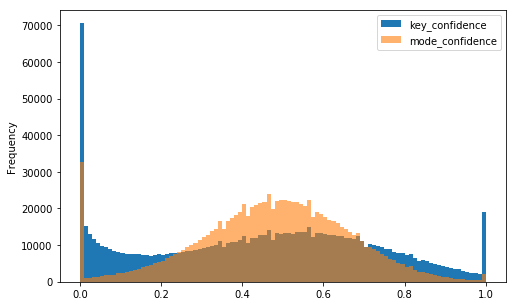

In [10]:
# print histograms of key confidence and mode confidence
import matplotlib.pyplot as plt
%matplotlib inline

fig = plt.gcf ()
fig.set_size_inches (8, 5)

msd_songs_df['key_confidence'].plot (kind='hist', bins=100)
msd_songs_df['mode_confidence'].plot (kind='hist', bins=100, alpha=0.6)

plt.legend ();

In [11]:
songs_conf = msd_songs_df.loc[(msd_songs_df['key_confidence']>0.75) & (msd_songs_df['mode_confidence']>0.75)]

In [12]:
display (songs_conf.head ())
print (songs_conf.shape)

,analysis_sample_rate,audio_md5,danceability,duration,end_of_fade_in,energy,idx_bars_confidence,idx_bars_start,idx_beats_confidence,idx_beats_start,...,key,key_confidence,loudness,mode,mode_confidence,start_of_fade_out,tempo,time_signature,time_signature_confidence,track_id
54,22050,f1954b3379db79a11f9f46f0751b239a,0.0,201.14240,0.000,0.0,0,0,0,0,...,7,0.896,-11.477,1,0.852,197.364,114.493,4,0.600,TRMMMGL128F92FD6AB
59,22050,7e99bdf74746e29da7432ea181126153,0.0,200.09751,3.059,0.0,0,0,0,0,...,10,0.882,-8.521,1,0.799,191.187,75.507,4,0.235,TRMMWMT128F9320CFD
64,22050,1c04cde3650de93f1eabc06b1214bd3d,0.0,152.24118,0.084,0.0,0,0,0,0,...,2,0.966,-6.768,1,0.990,152.241,128.175,1,0.000,TRMMWZE12903D0EB43
73,22050,e2db9af8d841ccc8bba179b50f8a5788,0.0,241.78893,0.194,0.0,0,0,0,0,...,0,1.000,-9.089,1,0.905,238.788,91.974,4,0.130,TRMMWMT128F9345B1B
103,22050,a0c5075b032fa9467aa27706e02d91a4,0.0,214.72608,0.502,0.0,0,0,0,0,...,2,1.000,-16.003,1,0.991,210.036,99.101,4,0.945,TRMMWJM128F4227255


(47938, 31)


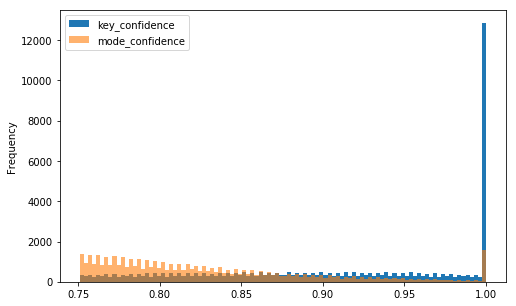

In [13]:
# print histograms of key confidence and mode confidence
import matplotlib.pyplot as plt
%matplotlib inline

fig = plt.gcf ()
fig.set_size_inches (8, 5)

songs_conf['key_confidence'].plot (kind='hist', bins=100)
songs_conf['mode_confidence'].plot (kind='hist', bins=100, alpha=0.6)

plt.legend ();

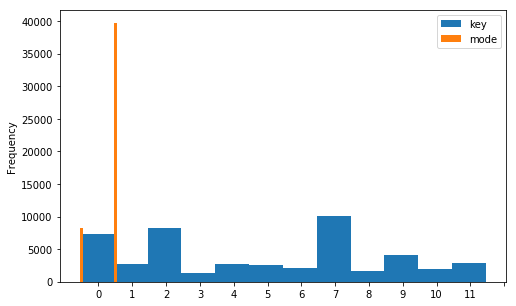

In [81]:
fig, axs = plt.subplots ()
fig.set_size_inches (8, 5)

songs_conf['key'].plot (kind='hist', ax=axs, bins=12)
songs_conf['mode'].plot (kind='hist', ax=axs, bins=12)

plt.xticks (np.arange (0+1/2, 12, 11/12), range (0, 12))
plt.legend ();

In [15]:
overall_length = 0
for i in range (12):
    for j in range (2):
        k = len (songs_conf.loc[(songs_conf['key']==i) & (songs_conf['mode']==j)])
        print (i, j, ':', k)
        overall_length += k
print (overall_length)

0 0 : 874
0 1 : 6452
1 0 : 606
1 1 : 2200
2 0 : 797
2 1 : 7461
3 0 : 142
3 1 : 1138
4 0 : 715
4 1 : 2052
5 0 : 551
5 1 : 2011
6 0 : 684
6 1 : 1442
7 0 : 727
7 1 : 9432
8 0 : 199
8 1 : 1394
9 0 : 1004
9 1 : 3163
10 0 : 693
10 1 : 1266
11 0 : 1222
11 1 : 1713
47938


In [16]:
# get artist name and song title from another msd file...
# read the 'all track Echo Nest ID' file
# it is a text file, each line is formatted: track id<SEP>song id<SEP>artist name<SEP>song title
import os
import pandas as pd

file_name = os.path.join ('src', 'unique_tracks.txt')
col_names = ['track_id', 'song_id', 'artist_name', 'song_title']
echo_tracks = pd.read_table (file_name, sep='<SEP>', header=None, names=col_names, engine='python')

In [17]:
from IPython.display import display

display (echo_tracks.head ())
print ('[i] Number of records:', len (echo_tracks))

,track_id,song_id,artist_name,song_title
0,TRMMMYQ128F932D901,SOQMMHC12AB0180CB8,Faster Pussy cat,Silent Night
1,TRMMMKD128F425225D,SOVFVAK12A8C1350D9,Karkkiautomaatti,Tanssi vaan
2,TRMMMRX128F93187D9,SOGTUKN12AB017F4F1,Hudson Mohawke,No One Could Ever
3,TRMMMCH128F425532C,SOBNYVR12A8C13558C,Yerba Brava,Si Vos Querés
4,TRMMMWA128F426B589,SOHSBXH12A8C13B0DF,Der Mystic,Tangle Of Aspens


[i] Number of records: 1000000


In [18]:
# unique db-key = track_id (db-key = database key, to avoid confusion with audio key)
# db-key from songs_conf only taken into consideration
songs_conf_tracks = songs_conf.merge (echo_tracks, how='left', on=['track_id'], validate='one_to_one')

In [19]:
display (songs_conf_tracks.head ())
print (len (songs_conf_tracks))

,analysis_sample_rate,audio_md5,danceability,duration,end_of_fade_in,energy,idx_bars_confidence,idx_bars_start,idx_beats_confidence,idx_beats_start,...,mode,mode_confidence,start_of_fade_out,tempo,time_signature,time_signature_confidence,track_id,song_id,artist_name,song_title
0,22050,f1954b3379db79a11f9f46f0751b239a,0.0,201.14240,0.000,0.0,0,0,0,0,...,1,0.852,197.364,114.493,4,0.600,TRMMMGL128F92FD6AB,SOHSSPG12A8C144BE0,Clifford T. Ward,Mad About You
1,22050,7e99bdf74746e29da7432ea181126153,0.0,200.09751,3.059,0.0,0,0,0,0,...,1,0.799,191.187,75.507,4,0.235,TRMMWMT128F9320CFD,SOFSJXP12AB017E676,Katie Armiger,I Just Want To Be With You This Christmas
2,22050,1c04cde3650de93f1eabc06b1214bd3d,0.0,152.24118,0.084,0.0,0,0,0,0,...,1,0.990,152.241,128.175,1,0.000,TRMMWZE12903D0EB43,SOEBDKM12AC4686D3A,Kultiration,Bakslag
3,22050,e2db9af8d841ccc8bba179b50f8a5788,0.0,241.78893,0.194,0.0,0,0,0,0,...,1,0.905,238.788,91.974,4,0.130,TRMMWMT128F9345B1B,SOXAGQZ12AB018A089,Andrea Klas,Ride
4,22050,a0c5075b032fa9467aa27706e02d91a4,0.0,214.72608,0.502,0.0,0,0,0,0,...,1,0.991,210.036,99.101,4,0.945,TRMMWJM128F4227255,SOOWUDY12A6D4FA0B0,Archie Roach,Summer Of My Life


47938


In [20]:
# [2018.08.12] found out, that there are duplicates in the list
# there exist multiple track_ids to one song_id -> remove duplicates
duplicates = songs_conf_tracks.duplicated (['song_id'], 'first')
print (duplicates.loc[(duplicates==True)].index)

Int64Index([ 4214,  8487, 14848, 15284, 16935, 18689, 18734, 20121, 22318,
            23122, 25517, 27037, 33853, 34744, 35327, 36491, 37475, 38447,
            39947, 41569, 42508, 42854, 44829, 47801, 47921],
           dtype='int64')


In [21]:
#print (duplicates.loc[(duplicates==True)], duplicates.loc[(duplicates==True)].size)
#print (duplicates.loc[(duplicates==True)].drop ([41569]))
songs_conf_tracks_un = songs_conf_tracks.drop (duplicates.loc[(duplicates==True)].index)
display (songs_conf_tracks_un.head ())
print (len (songs_conf_tracks_un))

,analysis_sample_rate,audio_md5,danceability,duration,end_of_fade_in,energy,idx_bars_confidence,idx_bars_start,idx_beats_confidence,idx_beats_start,...,mode,mode_confidence,start_of_fade_out,tempo,time_signature,time_signature_confidence,track_id,song_id,artist_name,song_title
0,22050,f1954b3379db79a11f9f46f0751b239a,0.0,201.14240,0.000,0.0,0,0,0,0,...,1,0.852,197.364,114.493,4,0.600,TRMMMGL128F92FD6AB,SOHSSPG12A8C144BE0,Clifford T. Ward,Mad About You
1,22050,7e99bdf74746e29da7432ea181126153,0.0,200.09751,3.059,0.0,0,0,0,0,...,1,0.799,191.187,75.507,4,0.235,TRMMWMT128F9320CFD,SOFSJXP12AB017E676,Katie Armiger,I Just Want To Be With You This Christmas
2,22050,1c04cde3650de93f1eabc06b1214bd3d,0.0,152.24118,0.084,0.0,0,0,0,0,...,1,0.990,152.241,128.175,1,0.000,TRMMWZE12903D0EB43,SOEBDKM12AC4686D3A,Kultiration,Bakslag
3,22050,e2db9af8d841ccc8bba179b50f8a5788,0.0,241.78893,0.194,0.0,0,0,0,0,...,1,0.905,238.788,91.974,4,0.130,TRMMWMT128F9345B1B,SOXAGQZ12AB018A089,Andrea Klas,Ride
4,22050,a0c5075b032fa9467aa27706e02d91a4,0.0,214.72608,0.502,0.0,0,0,0,0,...,1,0.991,210.036,99.101,4,0.945,TRMMWJM128F4227255,SOOWUDY12A6D4FA0B0,Archie Roach,Summer Of My Life


47913


In [22]:
# TODO: get rid of columns we don't need
# here it is easier to filter by the columns we need
print (list (songs_conf_tracks_un.columns.values))

['analysis_sample_rate', 'audio_md5', 'danceability', 'duration', 'end_of_fade_in', 'energy', 'idx_bars_confidence', 'idx_bars_start', 'idx_beats_confidence', 'idx_beats_start', 'idx_sections_confidence', 'idx_sections_start', 'idx_segments_confidence', 'idx_segments_loudness_max', 'idx_segments_loudness_max_time', 'idx_segments_loudness_start', 'idx_segments_pitches', 'idx_segments_start', 'idx_segments_timbre', 'idx_tatums_confidence', 'idx_tatums_start', 'key', 'key_confidence', 'loudness', 'mode', 'mode_confidence', 'start_of_fade_out', 'tempo', 'time_signature', 'time_signature_confidence', 'track_id', 'song_id', 'artist_name', 'song_title']


In [23]:
keep_cols = ['key', 'key_confidence', 'mode', 'mode_confidence',
             'track_id', 'song_id', 'artist_name', 'song_title']

songs_conf_tracks_un_filt = songs_conf_tracks_un.filter (items=keep_cols, axis=1)

display (songs_conf_tracks_un_filt.head ())
print (len (songs_conf_tracks_un_filt))

,key,key_confidence,mode,mode_confidence,track_id,song_id,artist_name,song_title
0,7,0.896,1,0.852,TRMMMGL128F92FD6AB,SOHSSPG12A8C144BE0,Clifford T. Ward,Mad About You
1,10,0.882,1,0.799,TRMMWMT128F9320CFD,SOFSJXP12AB017E676,Katie Armiger,I Just Want To Be With You This Christmas
2,2,0.966,1,0.990,TRMMWZE12903D0EB43,SOEBDKM12AC4686D3A,Kultiration,Bakslag
3,0,1.000,1,0.905,TRMMWMT128F9345B1B,SOXAGQZ12AB018A089,Andrea Klas,Ride
4,2,1.000,1,0.991,TRMMWJM128F4227255,SOOWUDY12A6D4FA0B0,Archie Roach,Summer Of My Life


47913


In [24]:
# save the stuff (so we don't have to do all the above stuff again)
songs_conf_tracks_un_filt.to_csv ('songs_conf=75_tracks_filt.csv')

# obsolete

## retrieve genre
why obsolete: it turned out, that the genre information is empty

In [27]:
# [2018.08.12] - read metadata table to get genre of songs
# genre will be used for choosing different songs for each key-mode pair
import os
import numpy as np
import tables as pt

file_name = os.path.join ('src', 'msd_summary_file.h5')
h5_file = pt.open_file (file_name, mode='r')

metadata_table = h5_file.get_node ('/metadata/songs')
msd_metadata = metadata_table.read ()
metadata_table_colnames = metadata_table.colnames

h5_file.close ()

In [28]:
import pandas as pd
from IPython.display import display

msd_metadata_df = pd.DataFrame (msd_metadata, columns=metadata_table_colnames)

if isinstance (msd_metadata_df['genre'].values[0], bytes):
    msd_metadata_df['genre'] = msd_metadata_df['genre'].map (lambda x: x.decode())
    msd_metadata_df['song_id'] = msd_metadata_df['song_id'].map (lambda x: x.decode())

In [29]:
display (msd_metadata_df.head (2))

,analyzer_version,artist_7digitalid,artist_familiarity,artist_hotttnesss,artist_id,artist_latitude,artist_location,artist_longitude,artist_mbid,artist_name,artist_playmeid,genre,idx_artist_terms,idx_similar_artists,release,release_7digitalid,song_hotttnesss,song_id,title,track_7digitalid
0,b'',4069,0.649822,0.394032,b'ARYZTJS1187B98C555',NaN,b'',NaN,b'357ff05d-848a-44cf-b608-cb34b5701ae5',b'Faster Pussy cat',44895,,0,0,b'Monster Ballads X-Mas',633681,0.542899,SOQMMHC12AB0180CB8,b'Silent Night',7032331
1,b'',113480,0.439604,0.356992,b'ARMVN3U1187FB3A1EB',NaN,b'',NaN,b'8d7ef530-a6fd-4f8f-b2e2-74aec765e0f9',b'Karkkiautomaatti',-1,,0,0,b'Karkuteill\xc3\xa4',145266,0.299877,SOVFVAK12A8C1350D9,b'Tanssi vaan',1514808


In [30]:
# drop unneeded columns
keep_cols = ['genre', 'song_id', 'track_7digitalid']
msd_metadata_df_filt = msd_metadata_df.filter (items=keep_cols, axis=1)

In [37]:
# merge tables, but with validation = on-to-many (since left table has unique song_ids)
songs_conf_tracks_un_filt_genre = \
    songs_conf_tracks_un_filt.merge (msd_metadata_df_filt, how='left', on=['song_id'], validate='one_to_many')

In [39]:
# remove duplicates
duplicates = songs_conf_tracks_un_filt_genre.duplicated (['song_id'], 'first')
songs_conf_tracks_un_filt_genre = songs_conf_tracks_un_filt_genre.drop (duplicates.loc[(duplicates==True)].index)

In [40]:
display (songs_conf_tracks_un_filt_genre.head ())
print (len (songs_conf_tracks_un_filt_genre))

,key,key_confidence,mode,mode_confidence,track_id,song_id,artist_name,song_title,genre,track_7digitalid
0,7,0.896,1,0.852,TRMMMGL128F92FD6AB,SOHSSPG12A8C144BE0,Clifford T. Ward,Mad About You,,6833759
1,10,0.882,1,0.799,TRMMWMT128F9320CFD,SOFSJXP12AB017E676,Katie Armiger,I Just Want To Be With You This Christmas,,5538894
2,2,0.966,1,0.990,TRMMWZE12903D0EB43,SOEBDKM12AC4686D3A,Kultiration,Bakslag,,7767984
3,0,1.000,1,0.905,TRMMWMT128F9345B1B,SOXAGQZ12AB018A089,Andrea Klas,Ride,,5241883
4,2,1.000,1,0.991,TRMMWJM128F4227255,SOOWUDY12A6D4FA0B0,Archie Roach,Summer Of My Life,,1278925


47913


In [41]:
# save the stuff (so we don't have to do all the above stuff again)
#songs_conf_tracks_un_filt_genre.to_csv ('songs_conf=75_tracks_un_filt_genre.csv')